In [ ]:
!pip install grad-cam

In [6]:
import torch, cv2
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

In [ ]:
model

In [16]:
# Initialize CNN Model
model = torchvision.models.resnet50(pretrained = True)

# Load Fully Trained Model
model.load_state_dict(torch.load('best.pth.tar')['state_dict'])
model.eval()

# Define Preprocessing Transforms
preprocess = transforms.Compose([
    transforms.Resize((152, 672)),
    transforms.ToTensor(),
])

# Load The Input Sample Image
img_path = '/content/girl-5531217_1280.jpg'
input_image = Image.open(img_path)

# Define Target layer of GradCAM
label = 0
target_layers = [model.layer4[-1]]
input_tensor = preprocess(input_image).unsqueeze(0)
cam = GradCAM(model=model, target_layers=target_layers)
targets = [ClassifierOutputTarget(label)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

input_array = np.array(input_image)
resized_input_array = cv2.resize(input_array, (672, 152))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 58.3MB/s]


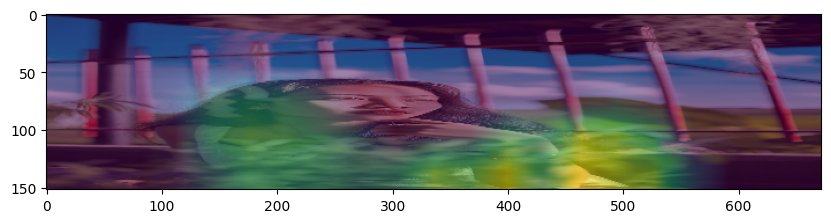

In [17]:
# Visualize
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.imshow(resized_input_array, cmap='gray')
ax.imshow(grayscale_cam[0], alpha=0.5)